In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
test_results = pd.read_csv('/Users/baharsharafi/Documents/Insight\
/Data_Challenges/Pricing_Test/test_results.csv')

users = pd.read_csv('/Users/baharsharafi/Documents/Insight\
/Data_Challenges/Pricing_Test/user_table.csv')

In [3]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


## I joined the two tables by user_id:
But in the end I didn't get around to looking at the geographic information.

In [5]:
users_1 = users.set_index('user_id')
test_results_1 = test_results.set_index('user_id')
dataset = pd.concat([test_results_1,users_1],axis = 1)

Some users are not in the users table, so the joined dataset ends up with some nans for location information.

# How much money did we make per user exposed to the website under test and control conditions? 

In [7]:
test_results_test = test_results[test_results.test == 1]
convert_rate_test = sum(test_results_test.converted)/len(test_results_test)
revenue_per_test = convert_rate_test*59
test_results_control = test_results[test_results.test == 0]
convert_rate_control =sum(test_results_control.converted)/len(test_results_control)
revenue_per_control = convert_rate_control*39
revenue_differenece = revenue_per_test-revenue_per_control

# When could we have stopped the test?

# Some exploration of the data:
But in the end I didn't get around to looking at the geographic information.

In [5]:
len(users)

275616

In [6]:
len(test_results)

316800

In [7]:
aux = np.setdiff1d(np.array(test_results.user_id),np.array(users.user_id))

In [8]:
len(aux)

41184

In [9]:
aux1 = np.setdiff1d(np.array(users.user_id),np.array(test_results.user_id))

In [150]:
users_1 = users.set_index('user_id')
test_results_1 = test_results.set_index('user_id')

In [158]:
users_2 = users_1.reindex(test_results_1.index)

In [160]:
len(users_2)

316800

In [161]:
len(test_results_1)

316800

In [163]:
gooz = test_results_1.head()
choss = users_2.head()

In [178]:
dataset = pd.concat([test_results_1,users_1],axis = 1)

In [176]:
choss.head()

,timestamp,source,device,operative_system,test,price,converted,time,days,city,country,lat,long
user_id,,,,,,,,,,,,,
3,2015-04-17 23:22:21,seo_facebook,web,mac,1,59,0,2015-04-17 23:22:21,46.0,Olathe,USA,38.89,-94.81
9,2015-05-01 06:47:23,seo-google,mobile,android,0,39,0,2015-05-01 06:47:23,60.0,Bristol,USA,41.68,-72.94
14,2015-03-28 22:19:33,friend_referral,mobile,iOS,0,39,0,2015-03-28 22:19:33,26.0,Wilmington,USA,39.74,-75.53
16,2015-05-22 17:47:41,ads-google,mobile,android,0,39,0,2015-05-22 17:47:41,81.0,Antioch,USA,37.99,-121.80
19,2015-04-01 09:25:03,ads-google,mobile,android,0,39,0,2015-04-01 09:25:03,30.0,Akron,USA,41.08,-81.52


In [172]:
table = pd.concat([choss,gooz],axis= 1)

yeah well i can't figure out why this concat is not working so i give up on this'

In [ ]:
test_results.head()

What are some things we can learn? Does add source or time of day or operation system affect conversion?

## What percentage of users where in each group?

In [3]:
sum(test_results.test)/len(test_results)

0.36007891414141413

What percentage of total convert and of each group?

In [7]:
test_results_test = test_results[test_results.test == 1]
convert_rate_test = sum(test_results_test.converted)/len(test_results_test)
revenue_per_test = convert_rate_test*59
test_results_control = test_results[test_results.test == 0]
convert_rate_control =sum(test_results_control.converted)/len(test_results_control)
revenue_per_control = convert_rate_control*39
revenue_differenece = revenue_per_test-revenue_per_control

# How to show that these are statistically significant?

Basically I want to know that my conversion rates are reliable, right?
That is one way to look at it. But because on the other hand I want to know if I could have stopped sooner. 
Could I have seen the 14 cent effect size sooner? One way is to take the difference in profit over time and see when it becomes stable. This is not very statistical.



# When could the test have been stopped?

## Calculated the revenue per user exposed, cumulatively, for each day that the test was run:

### Days from timestamps:

In [8]:
timestamp = pd.to_datetime(test_results.timestamp,errors='coerce') 
# Some if the time stamps are incorrect and will be replaced by Nans
days = timestamp - timestamp.min()
aux1 = pd.to_timedelta(days)
aux2 = aux1.apply(lambda x: x.days)
test_results['days'] = aux2

In [10]:
# Toss out records with NaN days that result from incorrect time stamps (this is about 3% of the data it is ok :-)
mask = test_results['days'].isnull()
test_results_noNat = test_results[~mask]
test_results_by_date = test_results_noNat.sort_values('timestamp')
test_results_by_date.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,days
166052,503836,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,0.0
215757,813537,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,0.0
20240,583796,2015-03-02 00:12:40,ads_facebook,web,windows,0,39,0,0.0
278620,632922,2015-03-02 00:16:25,ads-google,web,windows,0,39,0,0.0
209555,16110,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,0.0


## Converstion rates per day:

In [26]:
groups = test_results_by_date.groupby('days')
num_days = pd.unique(test_results_noNat.days)
len_df = len(num_days)

cum_table = pd.DataFrame({'tested':np.repeat(np.NaN,(len_df,)),
                          'test_converted':np.repeat(np.NaN,(len_df,)),
                          'control':np.repeat(np.NaN,(len_df,)),
                          'control_converted':np.repeat(np.NaN,(len_df,))},index = num_days.astype('int'))
cum_table_sort =  cum_table.sort_index()
for g,group in groups:
    cum_table_sort.loc[int(g),'tested'] = sum(group.test)
    cum_table_sort.loc[int(g),'control'] = len(group)-sum(group.test)
    test_converted = group[(group['test'] == 1) & (group['converted'] == 1)]
    cum_table_sort.loc[int(g),'test_converted'] = sum(test_converted.converted)
    
    control_converted = group[(group['test'] == 0) & (group['converted'] == 1)]
    cum_table_sort.loc[int(g),'control_converted'] = sum(control_converted.converted)


cum_table_sort['money_test_per'] = 59*cum_table_sort.test_converted/cum_table_sort.tested 

cum_table_sort['money_ctrl_per'] = 39*cum_table_sort.control_converted/cum_table_sort.control 

nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Seperate the test and control groups into two datasets to calculate the cumsum

In [15]:
test = test_results_by_date[test_results_by_date['test'] == 1]
control = test_results_by_date[test_results_by_date['test'] == 0]
# Calculate the cumsum:
test_group_converted_by_date = test['converted'].cumsum()
control_group_converted_by_date = control['converted'].cumsum()
test['cumsum'] = test_group_converted_by_date
control['cumsum'] = control_group_converted_by_date

# Number of tests by date:
nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [27]:
cum_table_sort.head()

,control,control_converted,test_converted,tested,money_test_per,money_ctrl_per
0,991.0,18.0,9.0,556.0,0.955036,0.708375
1,890.0,20.0,6.0,569.0,0.622144,0.876404
2,923.0,27.0,6.0,446.0,0.793722,1.140845
3,1711.0,46.0,24.0,1022.0,1.385519,1.048510
4,4476.0,80.0,41.0,2507.0,0.964898,0.697051


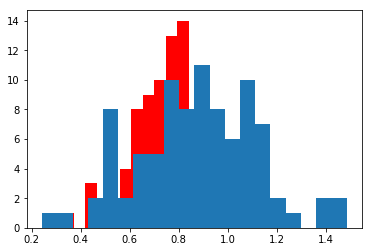

In [22]:
%matplotlib inline
plt.hist(cum_table_sort.money_ctrl_per,bins=20,color = 'r')
plt.hist(cum_table_sort.money_test_per,bins=20)
plt.show()

In [13]:
test_results['time'] = timestamp

In [14]:
timestamp.min()

Timestamp('2015-03-02 00:04:12')

In [15]:
timestamp.max()

Timestamp('2015-05-31 23:59:45')

In [19]:
days = timestamp - timestamp.min()
aux1 = pd.to_timedelta(days)
aux2 = aux1.apply(lambda x: x.days)
test_results['days'] = aux2

In [21]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,time,days
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,2015-05-08 03:38:34,67.0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,2015-05-10 21:08:46,69.0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,2015-04-04 15:01:23,33.0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,2015-05-07 07:26:01,66.0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,2015-05-24 11:04:40,83.0


In [23]:
# Toss out records with NaN days that result from incorrect time stamps (this is about 3% of the data it is ok :-)
mask = test_results['days'].isnull()
test_results_noNat = test_results[~mask]
test_results_by_date = test_results_noNat.sort_values('timestamp')
test_results_by_date.head()

In [27]:
test_results_noNat.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,time,days
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,2015-05-08 03:38:34,67.0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,2015-05-10 21:08:46,69.0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,2015-04-04 15:01:23,33.0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,2015-05-07 07:26:01,66.0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,2015-05-24 11:04:40,83.0


### Seperate the test and control groups into two datasets to calculate the cumsum

In [15]:
test = test_results_by_date[test_results_by_date['test'] == 1]
control = test_results_by_date[test_results_by_date['test'] == 0]
# Calculate the cumsum:
test_group_converted_by_date = test['converted'].cumsum()
control_group_converted_by_date = control['converted'].cumsum()
test['cumsum'] = test_group_converted_by_date
control['cumsum'] = control_group_converted_by_date

# Number of tests by date:
nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [23]:
# Toss out records with NaN days that result from incorrect time stamps (this is about 3% of the data it is ok :-)
mask = test_results['days'].isnull()
test_results_noNat = test_results[~mask]
test_results_by_date = test_results_noNat.sort_values('timestamp')
test_results_by_date.head()

In [49]:
sum(test_group_converted_by_date.index != test.index)

0

In [58]:
control.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,time,days,cumsum
20240,583796,2015-03-02 00:12:40,ads_facebook,web,windows,0,39,0,2015-03-02 00:12:40,0.0,0
278620,632922,2015-03-02 00:16:25,ads-google,web,windows,0,39,0,2015-03-02 00:16:25,0.0,0
209555,16110,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,2015-03-02 00:18:46,0.0,0
206916,813542,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,2015-03-02 00:18:46,0.0,0
271250,866803,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,2015-03-02 00:18:46,0.0,0


In [59]:
nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

In [16]:
choss = control['cumsum']
gooz = choss[1:-1]/nums_tests[1:-1]

In [17]:
%matplotlib
plt.plot(nums_tests[1:-1],gooz)
plt.show()

Using matplotlib backend: MacOSX


## Conversion rate per day:

In [137]:
cum_table_sort['cum_sum_tested'] = cum_table_sort['tested'].cumsum()

In [26]:
groups = test_results_by_date.groupby('days')
num_days = pd.unique(test_results_noNat.days)
len_df = len(num_days)

cum_table = pd.DataFrame({'tested':np.repeat(np.NaN,(len_df,)),
                          'test_converted':np.repeat(np.NaN,(len_df,)),
                          'control':np.repeat(np.NaN,(len_df,)),
                          'control_converted':np.repeat(np.NaN,(len_df,))},index = num_days.astype('int'))
cum_table_sort =  cum_table.sort_index()
for g,group in groups:
    cum_table_sort.loc[int(g),'tested'] = sum(group.test)
    cum_table_sort.loc[int(g),'control'] = len(group)-sum(group.test)
    test_converted = group[(group['test'] == 1) & (group['converted'] == 1)]
    cum_table_sort.loc[int(g),'test_converted'] = sum(test_converted.converted)
    
    control_converted = group[(group['test'] == 0) & (group['converted'] == 1)]
    cum_table_sort.loc[int(g),'control_converted'] = sum(control_converted.converted)


cum_table_sort['money_test_per'] = 59*cum_table_sort.test_converted/cum_table_sort.tested 

cum_table_sort['money_ctrl_per'] = 39*cum_table_sort.control_converted/cum_table_sort.control 

nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
cum_table_sort.head()

,control,control_converted,test_converted,tested,money_test_per,money_ctrl_per
0,991.0,18.0,9.0,556.0,0.955036,0.708375
1,890.0,20.0,6.0,569.0,0.622144,0.876404
2,923.0,27.0,6.0,446.0,0.793722,1.140845
3,1711.0,46.0,24.0,1022.0,1.385519,1.048510
4,4476.0,80.0,41.0,2507.0,0.964898,0.697051


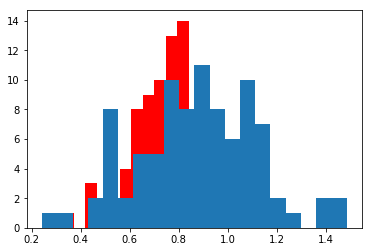

In [22]:
%matplotlib inline
plt.hist(cum_table_sort.money_ctrl_per,bins=20,color = 'r')
plt.hist(cum_table_sort.money_test_per,bins=20)
plt.show()

### Seperate the test and control groups into two datasets to calculate the cumsum

In [28]:
test = test_results_by_date[test_results_by_date['test'] == 1]
control = test_results_by_date[test_results_by_date['test'] == 0]
# Calculate the cumsum:
test_group_converted_by_date = test['converted'].cumsum()
control_group_converted_by_date = control['converted'].cumsum()
test['cumsum'] = test_group_converted_by_date
control['cumsum'] = control_group_converted_by_date

# Number of tests by date:
nums_tests = np.arange(len(control))
control['num_tests'] = nums_tests

/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

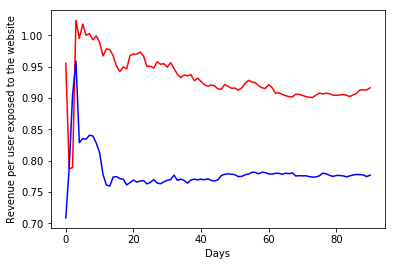

In [31]:
cum_table_sort['cum_sum_tested'] = cum_table_sort['tested'].cumsum()
cum_table_sort['cum_sum_control'] = cum_table_sort['control'].cumsum()
cum_table_sort['cum_sum_control_converted'] = cum_table_sort['control_converted'].cumsum()
cum_table_sort['cum_sum_test_converted'] = cum_table_sort['test_converted'].cumsum()
gooz_test = 59*cum_table_sort['cum_sum_test_converted']/cum_table_sort['cum_sum_tested']
gooz_control = 39*cum_table_sort['cum_sum_control_converted']/cum_table_sort['cum_sum_control']
plt.plot(gooz_test,'r')
plt.plot(gooz_control,'b')
plt.xlabel('Days')
plt.ylabel('Revenue per user exposed to the website')
plt.show()


# Findings from this section: 
By around 60 days the revenue per user is stable for the test and control conditions, they could have stopped there.

# Analysis of factors contributing to conversion:

In [230]:
features = test_results_by_date.copy()

In [231]:
features.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,time,days
166052,503836,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,2015-03-02 00:04:12,0.0
215757,813537,2015-03-02 00:04:12,ads-google,web,windows,1,59,0,2015-03-02 00:04:12,0.0
20240,583796,2015-03-02 00:12:40,ads_facebook,web,windows,0,39,0,2015-03-02 00:12:40,0.0
278620,632922,2015-03-02 00:16:25,ads-google,web,windows,0,39,0,2015-03-02 00:16:25,0.0
209555,16110,2015-03-02 00:18:46,direct_traffic,web,mac,0,39,0,2015-03-02 00:18:46,0.0


In [232]:
hour = features.time.apply(lambda x: x.hour)

In [233]:
features['hour'] = hour

In [267]:
ads_mask = features.source.apply(lambda x: True if re.search('ads',x) else False)
seo_mask = features.source.apply(lambda x: True if re.search('seo',x) else False)

# ads_mask = (features['source'] == 'ads')
# |(features['source'] == 'ads-facebook')
# |\
# (features['source'] == 'ads-bing')|(features['source'] == 'ads-yahoo')|(features['source'] == 'ads-other')

friend_mask = features['source'] == 'friend_referral'

direct_mask = features['source'] == 'direct_traffic'

In [279]:
seo = np.zeros((len(features),))
seo[seo_mask] = 1
features['seo'] = seo

In [282]:
ads = np.zeros((len(features),))
ads[ads_mask] = 1
features['ads'] = ads

In [283]:
direct = np.zeros((len(features),))
direct[direct_mask] = 1
features['direct'] = direct

In [284]:
friend = np.zeros((len(features),))
friend[friend_mask] = 1
features['friend'] = friend

In [286]:
pd.unique(features.operative_system)

array(['windows', 'mac', 'iOS', 'android', 'other', 'linux'], dtype=object)

## one-hot encode the operating system:

In [289]:
choss = pd.get_dummies(features.operative_system)

In [293]:
gooz = pd.get_dummies(features.device)

In [295]:
feature = pd.concat([features,choss,gooz],axis = 1)

In [312]:
%matplotlib
plt.plot(features.index,color = 'r')
plt.show()

Using matplotlib backend: MacOSX


In [303]:
len(features.hour)

306529

In [304]:
len(features.index)

306529

In [199]:
pd.unique(features.source)

array(['ads-google', 'ads_facebook', 'direct_traffic', 'seo-other',
       'ads_other', 'friend_referral', 'seo-yahoo', 'seo-google',
       'ads-yahoo', 'ads-bing', 'seo_facebook', 'seo-bing'], dtype=object)

In [320]:
# Xtrain = feature['seo','ads','direct','friend',]
feature.drop('timestamp',axis = 1,inplace = True)

In [323]:
feature.drop(['time','source','device','operative_system'],axis = 1,inplace = True)

## Balanced training set:

In [358]:
feature_conv = feature[feature['converted'] == 1]

In [359]:
feature_noconv = feature[feature['converted'] == 0]

In [364]:
from sklearn.utils import resample
feature_conv_resampled = resample(feature_conv,n_samples = len(feature_noconv))

In [367]:
feature_res = pd.concat([feature_conv_resampled,feature_noconv])

In [368]:
Xtrain = feature_res[['seo','ads','direct','friend','android','iOS','linux','mac','other','windows','mobile','web','test']]
# 'seo','ads','direct','friend',
ytrain = feature_res['converted']

In [369]:
len(feature_noconv)/len(feature_conv)

53.54252669039146

In [370]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
# from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble,metrics
from sklearn import linear_model

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

logreg = linear_model.LogisticRegression(solver = 'saga',max_iter=400)

# use a full grid over all parameters
param_grid = {"C": [1E-4,1E-3,1E-2,1E-1,1,10,100,1E3,1E4],
              "penalty": ["l1", "l2"]}

cv=StratifiedKFold(n_splits=5)
# run grid search
grid_search = GridSearchCV(logreg, param_grid=param_grid,cv=cv, n_jobs = -1, verbose = True)
start = time()

grid_search.fit(Xtrain, ytrain)


print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/envs/my_projects

GridSearchCV took 1126.38 seconds for 18 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 0.1, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 0.1, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 1, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 1, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 10, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 10, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 100, 'penalty': 'l1'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 100, 'penalty': 'l2'}

Model with rank: 1
Mean validation score: 0.571 (std: 0.001)
Parameters: {'C': 1000.0, 'penalty': 'l1'}

Model with ran

In [378]:
results = grid_search.cv_results_

In [395]:
my_model = grid_search.best_estimator_

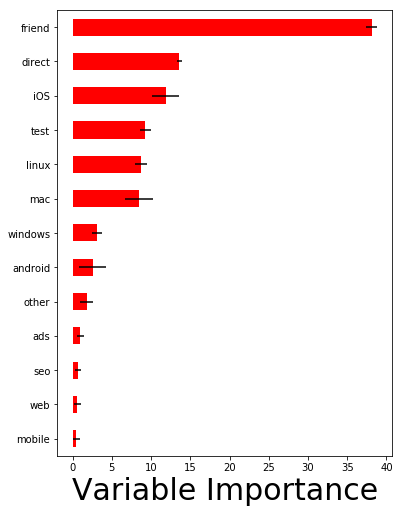

In [398]:
%matplotlib inline
std_importance = np.std([tree.feature_importances_ for tree in my_model.estimators_],axis=0)
Importance = pd.DataFrame({'Importance':my_model.feature_importances_*100,'std_importance':std_importance*100}, index=Xtrain.columns)

Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize = (6,8.2), xerr = 'std_importance' )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.gca().xaxis.label.set_size(30)
plt.show()

In [394]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

clf = ensemble.RandomForestClassifier(n_estimators=20)

# use a full grid over all parameters
param_grid = {"max_depth": [3, 10,None],
              "max_features": [3,6,13],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

cv=StratifiedKFold(n_splits=5)
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid,cv=cv, n_jobs = -1, verbose = True)
start = time()
grid_search.fit(Xtrain, ytrain)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 35.2min finished


GridSearchCV took 2117.61 seconds for 324 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.572 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth':

In [382]:
for i in range(1, 4):
    candidates = np.flatnonzero(results['rank_test_score'] == i)
    for candidate in candidates:
        print("Model with rank: {0}".format(i))
        print("Mean train score: {0:.3f} (std: {1:.3f})".format(
              results['mean_train_score'][candidate],
              results['std_train_score'][candidate]))
        print("Parameters: {0}".format(results['params'][candidate]))
        print("")

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 0.1, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 0.1, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 10, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 10, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 100, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 100, 'penalty': 'l2'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1000.0, 'penalty': 'l1'}

Model with rank: 1
Mean train score: 0.571 (std: 0.000)
Parameters: {'C': 1000.0, 'penalty': 'l2'}

Model with rank: 1
Mean train 

In [374]:
candidates = np.flatnonzero(grid_search.cv_results_['rank_test_score'] == 1)